# Portfolio Optimization
Reference : https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/

### Import Package

In [53]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

### Step1 : Pull the stock price data

In [54]:
# Read Data
test = data.DataReader(['0220.KL', '0105.KL','7120.KL','3298.KL'], 'yahoo', start='2021/01/01', end='2021/09/01')
test.head()

Attributes Adj Close                           Close                          \
Symbols      0220.KL 0105.KL 7120.KL 3298.KL 0220.KL 0105.KL 7120.KL 3298.KL   
Date                                                                           
2021-01-04     0.475   0.265   0.320    1.16   0.475   0.265   0.320    1.16   
2021-01-05     0.470   0.280   0.315    1.19   0.470   0.280   0.315    1.19   
2021-01-06     0.460   0.270   0.305    1.17   0.460   0.270   0.305    1.17   
2021-01-07     0.455   0.280   0.300    1.17   0.455   0.280   0.300    1.17   
2021-01-08     0.450   0.275   0.270    1.20   0.450   0.275   0.270    1.20   

Attributes    High          ...     Low            Open                  \
Symbols    0220.KL 0105.KL  ... 7120.KL 3298.KL 0220.KL 0105.KL 7120.KL   
Date                        ...                                           
2021-01-04   0.475   0.275  ...   0.300    1.16   0.450   0.270   0.315   
2021-01-05   0.485   0.295  ...   0.305    1.16   0.470   0.265   0.320   
2021-01-06   0.480   0.290  ...   0.300    1.16   0.480   0.285   0.320   
2021-01-07   0.465   0.285  ...   0.290    1.16   0.460   0.270   0.305   
2021-01-08   0.455   0.280  ...   0.265    1.17   0.455   0.280   0.305   

Attributes           Volume                             
Symbols    3298.KL  0220.KL   0105.KL  7120.KL 3298.KL  
Date                                                    
2021-01-04    1.18  1081600   1723000  8838500   94000  
2021-01-05    1.16  1325700  20758300  4137600  358700  
2021-01-06    1.19   859500  11365100  5153500  150400  
2021-01-07    1.17   552100   8463600  3360800  170500  
2021-01-08    1.17   487100   9149800  3947200  392100  

[5 rows x 24 columns]

In [9]:
# Extract Closing Price
test = test['Adj Close']
test.head()

Symbols,0220.KL,0105.KL,7120.KL,3298.KL
Date,,,,
2021-01-04,0.475,0.265,0.320,1.16
2021-01-05,0.470,0.280,0.315,1.19
2021-01-06,0.460,0.270,0.305,1.17
2021-01-07,0.455,0.280,0.300,1.17
2021-01-08,0.450,0.275,0.270,1.20


### Step 2 : Calculate the Percentage Change in Stock price

In [17]:
# Log of percentage change
ovh = test['0220.KL'].pct_change().apply(lambda x: np.log(1+x))
ovh.head()

#Apply to the other stocks
asiaply = test['0105.KL'].pct_change().apply(lambda x: np.log(1+x))
axteria = test['7120.KL'].pct_change().apply(lambda x: np.log(1+x))
hexza = test['3298.KL'].pct_change().apply(lambda x: np.log(1+x))
ovh.head()

Date
2021-01-04         NaN
2021-01-05   -0.010582
2021-01-06   -0.021506
2021-01-07   -0.010929
2021-01-08   -0.011050
Name: 0220.KL, dtype: float64

### Step 3 : Calculate the Variance

In [18]:
# Variance
var_ovh = ovh.var()
var_asiaply = asiaply.var()
var_axteria = axteria.var()
var_hexza = hexza.var()

In [19]:
# Volatility
ovh_vol = np.sqrt(var_ovh * 250)
asiaply_vol = np.sqrt(var_asiaply* 250)
axteria_vol = np.sqrt(var_axteria * 250)
hexza_vol = np.sqrt(var_hexza * 250)

<AxesSubplot:xlabel='Symbols'>

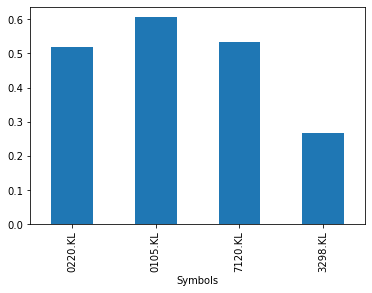

In [20]:
# plot the volatility for 4 stocks
test.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')

### Step 4 : Covariance

In [22]:
# Covariance between ovh asiply
test['0220.KL'].cov(test['0105.KL'])

0.0013994883450120603

### Step 5: Correlation

In [23]:
test['0220.KL'].corr(test['0105.KL'])

0.5240045874257595

### Step 6 : Expected Return

In [24]:
test2 = test.pct_change().apply(lambda x: np.log(1+x))
test2.head()

Symbols,0220.KL,0105.KL,7120.KL,3298.KL
Date,,,,
2021-01-04,NaN,NaN,NaN,NaN
2021-01-05,-0.010582,0.055060,-0.015748,0.025533
2021-01-06,-0.021506,-0.036368,-0.032261,-0.016950
2021-01-07,-0.010929,0.036368,-0.016529,0.000000
2021-01-08,-0.011050,-0.018018,-0.105361,0.025318


### Step 7 : Weight

In [26]:
# Define weights for allocation
w = [0.25,0.25,0.25, 0.25]
e_r_ind = test2.mean()
e_r_ind

Symbols
0220.KL   -0.002854
0105.KL   -0.001299
7120.KL   -0.001290
3298.KL   -0.000502
dtype: float64

In [27]:
# Total expected return
e_r = (e_r_ind*w).sum()
e_r
#> .0003027691524101118

-0.0014860631402053579

### Step 8 : Building an optimal risky portfolio

In [34]:
# Import data
df = data.DataReader(['0220.KL', '0105.KL','7120.KL','3298.KL'], 'yahoo', start='2020/06/01', end='2021/09/01')
df.head()

Attributes Adj Close                             Close                  \
Symbols      0220.KL 0105.KL 7120.KL   3298.KL 0220.KL 0105.KL 7120.KL   
Date                                                                     
2020-06-02       NaN   0.065   0.445  1.187593     NaN   0.065   0.445   
2020-06-03       NaN   0.080   0.440  1.158148     NaN   0.080   0.440   
2020-06-04       NaN   0.090   0.500  1.177778     NaN   0.090   0.500   
2020-06-05       NaN   0.110   0.700  1.158148     NaN   0.110   0.700   
2020-06-09       NaN   0.100   0.560  1.128704     NaN   0.100   0.560   

Attributes            High          ...     Low            Open          \
Symbols    3298.KL 0220.KL 0105.KL  ... 7120.KL 3298.KL 0220.KL 0105.KL   
Date                                ...                                   
2020-06-02    1.21     NaN   0.065  ...   0.445    1.21     NaN   0.065   
2020-06-03    1.18     NaN   0.085  ...   0.410    1.15     NaN   0.075   
2020-06-04    1.20     NaN   0.090  ...   0.440    1.17     NaN   0.080   
2020-06-05    1.18     NaN   0.125  ...   0.505    1.16     NaN   0.095   
2020-06-09    1.15     NaN   0.120  ...   0.560    1.15     NaN   0.115   

Attributes                  Volume                                       
Symbols    7120.KL 3298.KL 0220.KL      0105.KL      7120.KL    3298.KL  
Date                                                                     
2020-06-02   0.445    1.21     NaN          0.0          0.0        0.0  
2020-06-03   0.480    1.26     NaN   13182800.0    8659300.0  3369200.0  
2020-06-04   0.455    1.18     NaN   11716400.0   35116500.0  1928500.0  
2020-06-05   0.525    1.20     NaN  104106700.0  156099000.0  1782400.0  
2020-06-09   0.650    1.19     NaN   18680900.0   83229800.0  1894000.0  

[5 rows x 24 columns]

In [35]:
# Closing price
df = df['Adj Close']
df.head()

Symbols,0220.KL,0105.KL,7120.KL,3298.KL
Date,,,,
2020-06-02,NaN,0.065,0.445,1.187593
2020-06-03,NaN,0.080,0.440,1.158148
2020-06-04,NaN,0.090,0.500,1.177778
2020-06-05,NaN,0.110,0.700,1.158148
2020-06-09,NaN,0.100,0.560,1.128704


### Covariance and Correlation

In [56]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,0220.KL,0105.KL,7120.KL,3298.KL
Symbols,,,,
0220.KL,0.001388,0.000146,0.000093,0.000250
0105.KL,0.000146,0.002914,0.000470,0.000433
7120.KL,0.000093,0.000470,0.002024,0.000182
3298.KL,0.000250,0.000433,0.000182,0.000993


In [71]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,0220.KL,0105.KL,7120.KL,3298.KL
Symbols,,,,
0220.KL,1.000000,0.086619,0.071762,0.213435
0105.KL,0.086619,1.000000,0.193617,0.254396
7120.KL,0.071762,0.193617,1.000000,0.128476
3298.KL,0.213435,0.254396,0.128476,1.000000


### Portfolio expected returns

In [57]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,0220.KL,0105.KL,7120.KL,3298.KL
Symbols,,,,
0220.KL,0.001388,0.000146,0.000093,0.000250
0105.KL,0.000146,0.002914,0.000470,0.000433
7120.KL,0.000093,0.000470,0.002024,0.000182
3298.KL,0.000250,0.000433,0.000182,0.000993


In [58]:
# Randomly weighted portfolio's variance
w = {'0220.KL': 0.1, '0105.KL': 0.2, '7120.KL': 0.5, '3298.KL': 0.2}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.0008664623926148553

In [59]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

Symbols
0220.KL   -0.325843
0105.KL   -0.203704
7120.KL   -0.161290
3298.KL   -0.093220
dtype: float64

In [60]:
# Portfolio returns
w = [0.1, 0.2, 0.5, 0.2]
port_er = (w*ind_er).sum()
port_er

-0.17261424106289489

### Plotting the efficient frontier

In [61]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
0220.KL    0.588974
0105.KL    0.853502
7120.KL    0.711365
3298.KL    0.498367
dtype: float64

In [62]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
0220.KL,-0.325843,0.588974
0105.KL,-0.203704,0.853502
7120.KL,-0.161290,0.711365
3298.KL,-0.093220,0.498367


In [63]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)
    
    data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]


In [64]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,0220.KL weight,0105.KL weight,7120.KL weight,3298.KL weight
0,-0.202633,0.393975,0.306078,0.232531,0.183945,0.277447
1,-0.197829,0.422637,0.231063,0.257145,0.329778,0.182014
2,-0.236064,0.412706,0.441336,0.225920,0.223581,0.109163
3,-0.186781,0.452406,0.222070,0.368353,0.017707,0.391871
4,-0.237613,0.421720,0.572675,0.083670,0.028371,0.315284


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

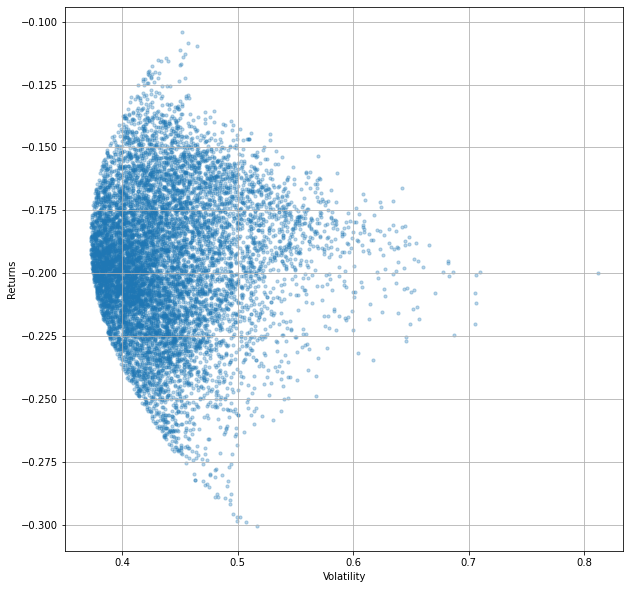

In [65]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

### Minimum Volality Portfolio

In [66]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns          -0.185800
Volatility        0.372756
0220.KL weight    0.295151
0105.KL weight    0.089981
7120.KL weight    0.205378
3298.KL weight    0.409491
Name: 2926, dtype: float64

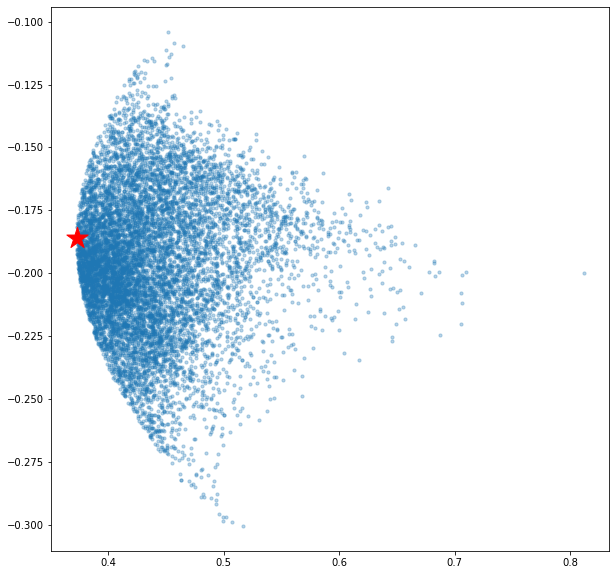

In [67]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

### Optimal Risky Portfolio

In [68]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns          -0.104041
Volatility        0.452030
0220.KL weight    0.004611
0105.KL weight    0.012736
7120.KL weight    0.122542
3298.KL weight    0.860111
Name: 9555, dtype: float64

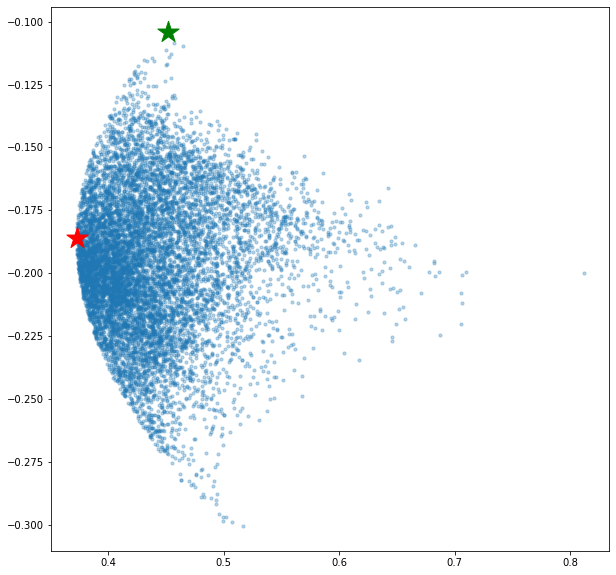

In [69]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)